<a href="https://colab.research.google.com/github/ksathperera/MLOM/blob/main/Lab03_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

In [3]:
# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

In [4]:
#to load dataset in keras
fashion_mnist = keras.datasets.fashion_mnist # load dataset

In [5]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data() # split into tetsing and training

4422102/4422102 [==============================] - 0s 0us/step


In [6]:
train_images.shape #to see shape of the training images

(60000, 28, 28)

In [7]:
train_images[0,23,23] # look at one pixel

194

In [8]:
train_labels[:10] # look at the first 10 training labels

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [10]:
#Let’s create an array of label names to indicate which is which.
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag',
'Ankle boot']   #this array can be used for the prediction purposes

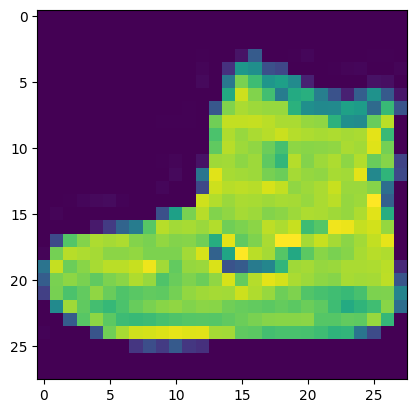

In [20]:
#let's look at what some of these images look like.
plt.figure()
plt.imshow(train_images[0])   #to show 1st image in the dataset

In [21]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [22]:
print(train_images[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.00392157 0.    

In [23]:
#We are going to use a keras sequential model with three different layers. This model represents a feed-forward neural network (one that passes values from left to right).
#model architecture
model = keras.Sequential([
keras.layers.Flatten(input_shape=(28, 28)), # input layer (1)
keras.layers.Dense(128, activation='relu'), # hidden layer (2)
keras.layers.Dense(10, activation='softmax') # output layer (3)
])

In [24]:
#complie the model
model.compile(optimizer='adam',
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])

In [25]:
#train the model
model.fit(train_images, train_labels, epochs=10) # we pass the data, labels and epochs

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4965 - accuracy: 0.8248
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3730 - accuracy: 0.8658
Epoch 3/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.3354 - accuracy: 0.8774
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3118 - accuracy: 0.8858
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2953 - accuracy: 0.8918
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2787 - accuracy: 0.8963
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2682 - accuracy: 0.9009
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2577 - accuracy: 0.9047
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2464 - accuracy: 0.9083
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.238

In [26]:
#evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.3331 - accuracy: 0.8809
Test accuracy: 0.8809000253677368


In [27]:
#making predictions
predictions = model.predict(test_images)

313/313 [==============================] - 2s 5ms/step


In [29]:
predictions[0]  #calling our first image to see predicted value for 1st image

array([3.2181763e-08, 7.0908427e-12, 2.5366592e-07, 1.5218029e-09,
       1.5325231e-08, 1.9566590e-02, 2.6870310e-08, 3.6694072e-02,
       3.1192055e-08, 9.4373894e-01], dtype=float32)

In [30]:
test_labels[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=uint8)

In [36]:
np.argmax(predictions[0]) #to see predictions is correct or wrong

9

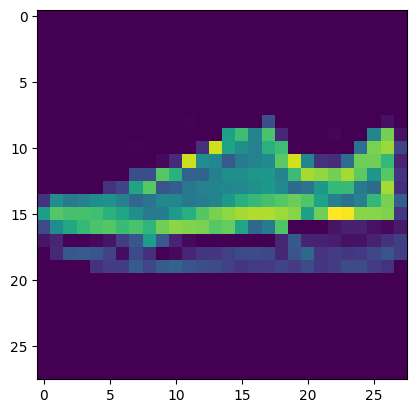

In [37]:
plt.imshow(test_images[9])  #get prediction images